# Practical Statistics for Data Scientists (Python)
# Chapter 2. Data and Sampling Distributions
> (c) 2019 Peter C. Bruce, Andrew Bruce, Peter Gedeck

###### Import required Python packages:

In [ ]:
%matplotlib inline

from pathlib import Path
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.utils import resample

import seaborn as sns
import matplotlib.pylab as plt

In [ ]:
try:
    import common
    DATA = common.dataDirectory()
except ImportError:
    DATA = Path().resolve() / 'data'

###### Define paths to data sets. If you don't keep your data in the same directory as the code,
adapt the path names.

In [ ]:
LOANS_INCOME_CSV = DATA / 'loans_income.csv'
SP500_DATA_CSV = DATA / 'sp500_data.csv.gz'

Figure 2.1 (below):
Left: Population - theoretical - strong assumptions
Right: Sample - practical - more modern approaches

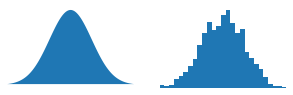

In [ ]:
np.random.seed(seed=3) #You can use any integer values as long as you remember the number used
# for initializing the seed for future reference.
x = np.linspace(-3, 3, 300)
xsample = stats.norm.rvs(size=1000) #take a random sample from a normal continuous random variable

fig, axes = plt.subplots(ncols=2, figsize=(5, 1.5)) # 2 Subplots

ax = axes[0]
ax.fill(x, stats.norm.pdf(x)) # density of a normal continuous random variable
ax.set_axis_off()
ax.set_xlim(-3, 3)

ax = axes[1]
ax.hist(xsample, bins=30)
ax.set_axis_off()
ax.set_xlim(-3, 3)
ax.set_position
#plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)

plt.show()

# Random Sampling and Sample Bias
Key concepts are:
- Sample
- Population
- N(n): the size of the population
- Random sampling
- Stratified Sampling: dividing the population into strata and randomly sampling from each strata
- Stratum: a homogeneous subgroup of a population with common characteristics
- Bias: systematic error
- Sample bias: sample that misrepresents the population. Nonrandom

Data Quality > Data Quantity. Data Quality = complete + consistent in format + clean + accurate +
*representative*

## Bias
random error != bias.
Note: when a result suggests a bias it is often an indicator that the model has been misspecified
or an important variable left out

## Random selection
Example of George Gallup's big (data) fail

## Size Versus Quality: When Does Size Matter?
Sometimes smaller is better: +time and +effort on random sampling => -bias +attention to
data exploration and data quality.

When are massive amounts of data needed? when the data is *big* and *sparse* (most of
the elements are zero). Example: Google queries
where the *pertinent records* are a few thousand but trillions of data points are needed to get them.

## Sample Mean Versus Population Mean
$\bar x$ != $\eta$
$\bar x$ is observed
$\eta$ is inferred

# Selection Bias
Key concepts are:
- Selection bias: selectively choosing data in a way that leads to a conclusion
that is misleading or ephemeral
- Data snooping: hunting through data in search of something interesting
- Vast search effect: run different models and ask different questions with a large
data set till you find something "interesting"

Specifying a hypothesis (exploratory study) and then collecting data following randomization and random sampling
principles ensures against bias (confirmatory study).

## Regression to the Mean
Extreme observations tend to be followed by more central ones.
Good player = Skill (+-constant) + Luck (random)

# Sampling Distribution of a Statistic
Key concepts are:
- Sample statistic: a metric calculated for a sample of data drawn from a larger population.
- Data distribution: the frequency distribution of individual *values* in a data set.
- Sampling distribution: the frequency distribution of a *sample statistic* over many samples or resamples. For
example a normal distribution of the mean over many samples
- Central limit theorem: the tendency of the sampling distribution to take on a normal shape as sample size rises
- Standard Error: the variability (standard deviation) of a *sample statistic* (like the mean) over many samples. !! it
shall not be confused with *standard deviation*, which refers to variability of individual data values)

| Standard   |      variability of       |
|----------|:-------------:|
| Deviation | individual values  |
| Error |    a *sample statistic*  |

## Central Limit Theorem
The distribution of a sample statistic like the mean is likely to be more bell-shaped than the distribution of
the data itself. The bigger the sample the more bell-shaped and the narrower the distribution of the sample statistic.
Assumption for the CLT to work: big sample size and the original data is not too far from a bell-shaped curve.

## Standard Error
Standard error is the standard deviation divided by the square root of the sample size => to reduce the standard
error by factor of 2 you need to increase the sample size by a factor of 4.

In [ ]:
loans_income = pd.read_csv(LOANS_INCOME_CSV, squeeze=True)

sample_data = pd.DataFrame({
    'income': loans_income.sample(1000),
    'type': 'Data',
})

sample_mean_05 = pd.DataFrame({
    'income': [loans_income.sample(5).mean() for _ in range(1000)],
    'type': 'Mean of 5',
})

sample_mean_20 = pd.DataFrame({
    'income': [loans_income.sample(20).mean() for _ in range(1000)],
    'type': 'Mean of 20',
})

results = pd.concat([sample_data, sample_mean_05, sample_mean_20])
print(results.head()) # TODO: why does it only print the head?

         income  type
29486   30000.0  Data
1890    60000.0  Data
14204  120000.0  Data
45735   45000.0  Data
44286   48150.0  Data


In [ ]:
# TODO: how does it know that it has to print 3 plots? or that "results" comes in 3 parts?
g = sns.FacetGrid(results, col='type', col_wrap=1, height=2, aspect=2)
g.map(plt.hist, 'income', range=[0, 200000], bins=40)
g.set_axis_labels('Income', 'Count')
g.set_titles('{col_name}')

plt.tight_layout()
plt.show()


# The Bootstrap
Collecting new samples from the data to estimate the standard error is very wasteful so we often use bootstrap.
It is the standard ways to estimate the standard error. It can be used for virtually any statistic and does not
rely on CLT.
It is an easy and effective way to estimate the sampling distribution of a statistic and there is no assumptions
about the data or the sample statistic being normally distributed (having bell-shape curve).
!!! Bootstraping does not compensate for a small sample size; it does not create data, nor does it fill in
holes in a existing data set. It merely informs us about how lots of additional samples would behave when drawn
from a population like our original sample.

## Resampling Versus Bootstrapping
- Resampling includes permutation procedures.
- Bootstrap always implies sampling with replacement from an observed data set

In [ ]:
results = []
for nrepeat in range(1000):
    sample = resample(loans_income)
    results.append(sample.median())
results = pd.Series(results)
print('Bootstrap Statistics:')
print(f'original: {loans_income.median()}')
print(f'bias: {results.mean() - loans_income.median()}') #jrv: I dunno where this bias definition comes from
print(f'std. error: {results.std()}')   #jrv: the std.error here is the std.deviation of the median over
                                        # many samples

Bootstrap Statistics:
original: 62000.0
bias: -71.64899999999761
std. error: 213.3286992716473


# Confidence Intervals
Ways to understand the potential error in a sample estimate:
- Frequency tables
- Histograms
- Boxplots
- Standard Errors
- **Confidence intervals**

90% confidence interval MEANS that this interval has the central 90% of the bootstrap sampling distribution of
sample statistic.
90% confidence interval DOES NOT MEAN that there is 90% probability that a certain value will be in that interval.
"Given a sample result, what is the probability that the population...?" => that needs more complex calculations.
*Level of confidence* is the percentage associated with the confidence interval. Higher Level of confidence means
wider interval. If you have little data and want to be more confident then you have to make your confidence interval
wider.
For a Data Scientist the confidence interval is used to get an idea of how variable a sample result might be. It is
useful to communicate the potential error in an estimate and maybe to see if you need a bigger sample.
Bootstrap is an effective way to construct confidence intervals.

This is the mean of all loans:  68760.51844
This is the mean of a sample of 20 loans:  55734.1
This is the mean of the 500 means of the sample of 20 loans:  55835.849599999994


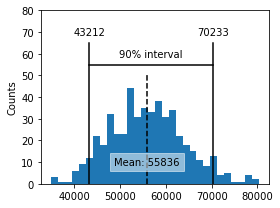

In [ ]:
print("This is the mean of all loans: ", loans_income.mean())
np.random.seed(seed=3)  
# create a sample of 20 loan income data
sample20 = resample(loans_income, n_samples=20, replace=False)
print("This is the mean of a sample of 20 loans: ", sample20.mean())

results = []
for nrepeat in range(500): #here I am doing bootstrap taking 500 samples with replacement from the
                            #original sample20
    sample = resample(sample20)
    results.append(sample.mean())
results = pd.Series(results)

confidence_interval = list(results.quantile([0.05, 0.95]))
ax = results.plot.hist(bins=30, figsize=(4, 3)) #plotea el histogram
ax.plot(confidence_interval, [55, 55], color='black') # plotea las lineas negras del confidence_interval
for x in confidence_interval:
    ax.plot([x, x], [0, 65], color='black')
    ax.text(x, 70, f'{x:.0f}', horizontalalignment='center', verticalalignment='center')
ax.text(sum(confidence_interval) / 2, 60, '90% interval',
        horizontalalignment='center', verticalalignment='center')

meanIncome = results.mean()
print("This is the mean of the 500 means of the sample of 20 loans: ", meanIncome)

ax.plot([meanIncome, meanIncome], [0, 50], color='black', linestyle='--')
ax.text(meanIncome, 10, f'Mean: {meanIncome:.0f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')
ax.set_ylim(0, 80)
ax.set_ylabel('Counts')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Counts')

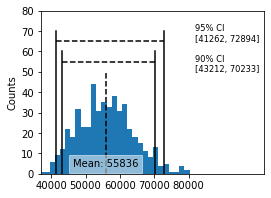

In [ ]:
np.random.seed(seed=3)
# create a sample of 20 loan income data
sample20 = resample(loans_income, n_samples=20, replace=False)

results = []
for nrepeat in range(500):
    sample = resample(sample20)
    results.append(sample.mean())
results = pd.Series(results)

confidence_interval = list(results.quantile([0.05, 0.95]))
ax = results.plot.hist(bins=30, figsize=(4, 3), color='C1')
ax.plot(confidence_interval, [55, 55], color='black', linestyle='--')
for x in confidence_interval:
    ax.plot([x, x], [0, 60], color='black')
ax.text(82000, 50, 
        f'90% CI\n[{confidence_interval[0]:.0f}, {confidence_interval[1]:.0f}]',
       fontsize='small')

confidence_interval = list(results.quantile([0.025, 0.975]))
ax = results.plot.hist(bins=30, figsize=(4, 3))
ax.plot(confidence_interval, [65, 65], color='black', linestyle='--')
for x in confidence_interval:
    ax.plot([x, x], [0, 70], color='black')
ax.text(82000, 65, 
        f'95% CI\n[{confidence_interval[0]:.0f}, {confidence_interval[1]:.0f}]',
       fontsize='small')
# ax.text(sum(confidence_interval) / 2, 264, '95 % interval',
#         horizontalalignment='center', verticalalignment='center')

meanIncome = results.mean()
ax.plot([meanIncome, meanIncome], [0, 50], color='black', linestyle='--')
ax.text(meanIncome, 5, f'Mean: {meanIncome:.0f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')
ax.set_ylim(0, 80)
ax.set_xlim(37000, 102000)
ax.set_xticks([40000, 50000, 60000, 70000, 80000])
ax.set_ylabel('Counts')

# plt.tight_layout()
# plt.show()

# Normal Distribution
Some key terms:
- Error: difference between data point and a predicted or average value.
- Standardize: subtract the mean and divide by the standard deviation.
- z-score: the result of standardizing an individual data point.
- Standard normal: a normal distribution with mean = 0 and std.deviation = 1.
- QQ-Plot: A plot to see how close a sample distribution is to a specified distribution.


| Thingie   |     the distribution is often normal      |
|----------|:-------------:|
| Raw data | No  |
| Error, average, other statistics |    Yes |


## Standard Normal and QQ-Plots

The QQ-Plot has each z-score in the y-axis and the x-asis corresponds to the quantile of a normal distribution
(or other distribution if wanted). Better explained in StatQuest https://www.youtube.com/watch?v=okjYjClSjOg&t=213s


The package _scipy_ has the function (`scipy.stats.probplot`) to create QQ-plots.
The argument `dist` specifies the
distribution, which is set by default to the normal distribution.

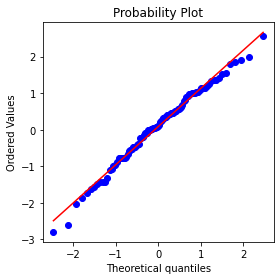

In [ ]:
fig, ax = plt.subplots(figsize=(4, 4))

norm_sample = stats.norm.rvs(size=100) #stats.uniform.rvs(size=100)

stats.probplot(norm_sample, plot=ax)

plt.tight_layout()
plt.show()

# Long-Tailed Distributions
Key terms:
- Tail: the long narrow portion of a frequency distribution, where relatively extreme values occur at low
frequency
- Skew: where one tail of a distribution is longer thatn the other.

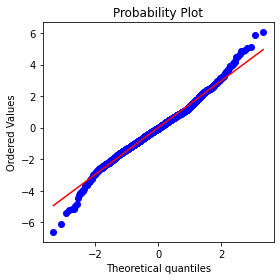

In [ ]:
sp500_px = pd.read_csv(SP500_DATA_CSV)

nflx = sp500_px.NFLX
nflx = np.diff(np.log(nflx[nflx>0]))

fig, ax = plt.subplots(figsize=(4, 4))
stats.probplot(nflx, plot=ax)

plt.tight_layout()
plt.show()

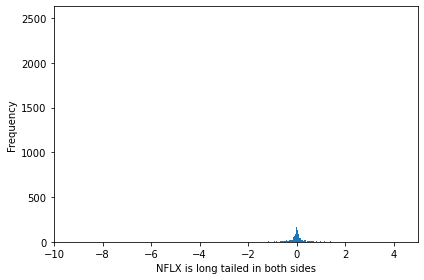

In [ ]:

sp500_px = pd.read_csv(SP500_DATA_CSV)
nflx = sp500_px.NFLX
ax = nflx.plot.hist(by=None, bins=1000)
ax.set_xlabel('NFLX is long tailed in both sides')

plt.tight_layout()
plt.show()

# Student's t-Distribution

The t-distribution is actually a family of distributions resembling the normal distribution but with
thicker tails.
It is much used as a reference for the distribution of sample means, differences between two sample
means, regression parameters, and more.
Note: the t-distribution is not central to the purposes of data science. Understanding and
quantifying  uncertainty and variation are important to data scientists, but empirical bootstrap
sampling can answer most questions about sampling error.
However, Data scientists will routinely.
encounter t-statistics in output from statistical software in T, like in A/B tests and regression,
so familiarity with it is helpful.

# Binomial Distribution
A trial is an event with a discrete outcome. If it has two outcomes then it is binomial.
Binomial outcomes are important to model, since they represent, basic decisions like sell/buy, ...
The binomial distribution is the frequency distribution of the number of successes (x) in a given
number of trials (n) with specified probability (p) of success in each trial.
A binomial trial is an experiment with two possible outcomes: one with probability p and the other
one with probability 1-p.
With large n, and provided p  is not too close to 0 or 1, the binomial distribution can be approximated
by the normal distribution.

In [ ]:
# see what this does if ever relevant in book
print(stats.binom.pmf(2, n=5, p=0.1))

0.0729


In [ ]:
# see what this does if ever relevant in book
print(stats.binom.cdf(2, n=5, p=0.1))

0.99144


# Chi-square Distribution
Expectation = "null hypothesis" = "null model" = nothing unusual or of note in the data.
A Chi-square statistic is a measure of the extent to which a set of observed values "fits" a
specified distribution. It measures the extent of departure from what you would expect in a
 null model.
 Example: practical to see the possible different effects of treatments in A/B testing.
The chi-square distribution is typically concerned with counts of subjects or items falling
 categories.


# F-Distribution
The F-distribution is used with experiments and linear models involving measured data.
The F-statistic compares variation due to factors of interest to overall variation.

# Poisson and Related Distribution
## Poisson Distributions
The Poisson distribution tells us the distribution of events per unit of time or space when we
sample many such units.
$\lambda$, Lambda is the mean number of events that occurs in a specified interval of time or space.
The variance of a Poisson distribution is also Lambda.

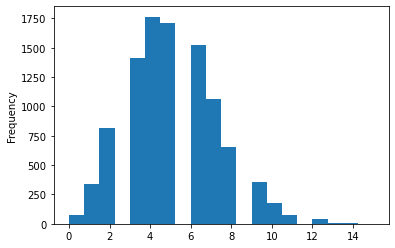

In [ ]:
#this code will generate 100 random numbers from a Poisson distribution with Lambda = 2, for example,
#incoming customer service calls average 2 per minute, this code will simulate 100 minutes
sample = stats.poisson.rvs(2, size=100)

pd.Series(sample).plot.hist(bins=10)
plt.show()

## Exponential Distribution
Exponential distributions can be used to model the time or distance between one event and
the next.

In [ ]:
#this code would generate 100 random numbers from an exponential distribution  where the mean
# number of events per time period is 0.2 (1/0.2 = 5). So you could use it to simulate 100 intervals, in
# minutes, between service calls, where the average rate of incoming calls is 0.2 per minute.
sample = stats.expon.rvs(scale=5, size=100)

pd.Series(sample).plot.hist()
plt.show()

## Estimating the Failure Rate
Via simulation, or direct calculation of probabilities, you can assess different hypothetical event
 rates and estimate threshold values below which the rate is very unlikely to fall


##  Weibull Distribution
The Weibull Distribution is used with a changing event rate over time (e.g., an increasing probability
of device failure).
How the event rate changes is specified by $\beta$. If $\beta$>1 the probability of an event increases
over time and if $\beta$<1 the probability of an event decreases over time

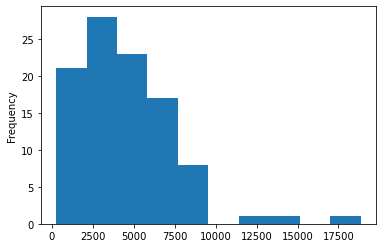

In [ ]:
sample = stats.weibull_min.rvs(1.5, scale=5000, size=100)

pd.Series(sample).plot.hist()
plt.show()
